# 분류 (Classification)

### Logistic Regression (로지스틱 회귀)

- 선형 회귀 방식으로 분류 문제를 해결하는 모델

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### 이진 분류를 위한 sigmoid 함수 (가장 대표적)
- 선형회귀식을 통해 도축한 예측값(z)을 0과 1 사이의 수(확률)로 변환해주는 활성화 함수 (Activation Function)

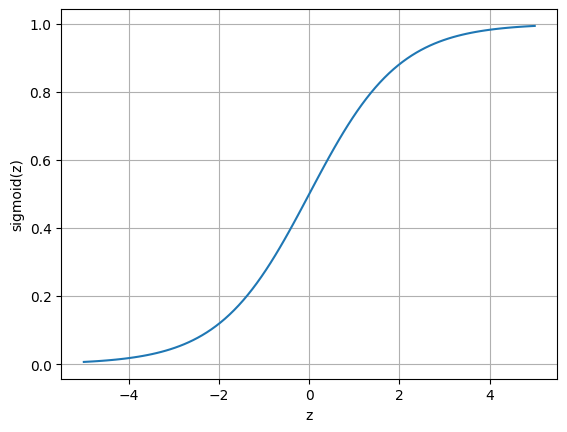

In [ ]:
z = np.linspace(-5, 5, 100) # 선형회귀 결과값
sigmoid_value = 1 / (1 + np.exp(-z))

# sigmoid_value z의 값이 1에 가까워질 수록 z값이 커짐. 그러나 1에 수렵할뿐. 1이 되진 않음.
plt.plot(z, sigmoid_value)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid()
plt.show()

In [10]:
fish_df = pd.read_csv('./data/fish.csv')
# fish_df.info()
# fish_df['Species'].value_counts()

is_bream_or_smelt = (fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt')
fish_df = fish_df[is_bream_or_smelt]
fish_df.describe()

,Weight,Length,Diagonal,Height,Width
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,444.500000,27.055102,31.120408,11.476400,4.259751
std,328.143233,10.242804,12.097296,6.150976,1.967686
min,6.700000,9.800000,10.800000,1.728400,1.047600
25%,19.700000,14.300000,15.200000,2.872800,1.879200
50%,500.000000,31.000000,36.200000,14.179500,5.072800
75%,700.000000,34.500000,39.700000,15.633000,5.589000
max,1000.000000,41.000000,46.500000,18.957000,6.749700


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = fish_df.drop('Species', axis=1)
y = fish_df['Species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled, y_test)

(1.0, 1.0)

In [ ]:
# 예측 (추론)
lr_clf.predict(X_test_scaled[:3])   # ['Bream', 'Smelt', 'Smelt']

# 분류 클래스
print(lr_clf.classes_)              # 분류 클래스: ['Bream', 'Smelt']

# 예측 확률 (분류 클래스별 확률)
lr_clf.predict_proba(X_test_scaled[:3])

['Bream' 'Smelt']


array([[0.94897272, 0.05102728],
       [0.01069927, 0.98930073],
       [0.02188743, 0.97811257]])

In [23]:
# [LogisticRegression의 추론 동작]

# 1. 선형회귀식을 통해 선형회귀값(z)를 계산
# dot : 내적함수
# z1 : 가중치와 편향을 가지고 직접 계산
# z2 : decision_function() 선형회귀값 계산 메서드 활용
z1 = np.dot(X_test_scaled[:3], lr_clf.coef_[0]) + lr_clf.intercept_
z2 = lr_clf.decision_function(X_test_scaled[:3])

# 2. 로지스틱 함수(sigmoid function)를 통과
sigmoid_z = 1 / (1 + np.exp(-z2))

# 3. 임계값(Threshold)을 기준으로 분류
['Smelt' if value >= 0.5 else 'Bream' for value in sigmoid_z]

['Bream', 'Smelt', 'Smelt']

In [16]:
# 가중치와 절편
lr_clf.coef_, lr_clf.intercept_

(array([[-0.57717269, -0.79233938, -0.82533982, -0.86579233, -0.82205625]]),
 array([-2.38186126]))

##### 다중 분류를 위한 Softmax 함수

- 다중 클래스 분류를 위한 활설화 함수로 각 클래스에 대한 확률값 계산

**다중 클래스 확률 계산 순서**
1. 샘플에 대한 회귀 결과 z 계산
2. softmax 함수 적용
    - z를 e의 지수로 적용해 값을 확대 (클래스별 z의 차이 극대화)
    - 합을 각 클래스의 값으로 나워 비율을 계산하고 반환
3. 가장 높은 확률 값을 가진 클래스 선택

In [25]:
from sklearn.datasets import make_classification

# make_classification(): 분류 문제 연습을 위한 가상 데이터셋 생성
X, y = make_classification(
    n_samples = 100         # 샘플개수
    , n_features = 4        # 전체 특성 개수
    , n_informative = 3     # 유의미한 특성 개수
    , n_redundant = 0       # 중복 특성 개수
    , n_classes = 3         # 클래스 수
    , random_state = 42     # 랜덤 시드
)

df = pd.DataFrame(X, columns=['feat1', 'feat2', 'feat3', 'feat4'])
df['target'] = y
df.describe()

,feat1,feat2,feat3,feat4,target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.210044,-0.358034,0.072789,-0.030238,0.990000
std,1.476291,1.424011,1.025196,1.513705,0.822598
min,-3.237603,-4.134541,-2.123896,-4.233589,0.000000
25%,-1.327009,-1.237692,-0.725955,-1.064047,0.000000
50%,-0.106284,-0.578167,0.057250,0.159812,1.000000
75%,0.725295,0.467806,0.713097,1.175425,2.000000
max,3.167356,3.580597,2.189803,2.862383,2.000000


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train, y_train), lr_clf.score(X_test, y_test)

(0.7066666666666667, 0.44)

In [35]:
print(lr_clf.predict(X_test[:5]))

# predict_proba = 클래스별 분류에 대한 확률 = softmax 함수 적용 결과
# 모든 확률의 합은 1
y_pred_proba = lr_clf.predict_proba(X_test[:5])
y_pred_proba.sum(axis=1)

[1 0 0 1 2]


array([1., 1., 1., 1., 1.])

In [48]:
# softmax 함수
def softmax(z) :
    exp_z = np.exp(z)
    sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)
    return exp_z / sum_exp_z

In [50]:
# [LogisticRegression의 추론 동작]

# 1. 선형회귀식을 통해 각각의 클래스에 대한 선형회귀값(z)를 계산
z = lr_clf.decision_function(X_test[:5])

# 2. softmax 함수를 통과 (-> 확률값으로 변환)
softmax_z = softmax(z)

# 3. 확률이 가장 높은 클래스로 분류
np.argmax(softmax_z, axis=1)

array([1, 0, 0, 1, 2])

In [ ]:
# 가중치 (3, 4) == 클래스 수, 특성 수
# 편향 (3, ) == 특성수
# 클래스 수, 특성 수 / 클래스수
lr_clf.coef_, lr_clf.intercept_

(array([[ 0.89441441,  0.61903765, -0.35254926, -0.16837743],
        [ 0.10632026,  0.03401018,  0.43335793,  0.09398105],
        [-1.00073467, -0.65304782, -0.08080867,  0.07439638]]),
 array([ 0.29927161,  0.3716549 , -0.67092651]))

In [ ]:
import scipy

# 함수 만들지 않고 import해서 쓰는 방법
scipy.special.softmax(z, axis=1)

##### [한번 해보기] 다중 생선 분류
1. 데이터 로드
2. 데이터 분리 및 정규화
3. LogisticRegression 모델 훈련 및 평가
4. 모델의 classes 확인 후, predict()와 predict_proba로 데스트 데이터 5개 예측<br>
결과확인

[ 2차 ] 5. 학습한 모델의 가중치, 편향을 가져와 np.dot() 연산으로 직접 z값 계산 6. softmax 함수 적용 (위에서 정의한 함수) 7. 6에서 나온 값으로 확률이 가장 높은 클래스 예측 결과 출력

In [74]:
# 1. 데이터 로드
fish_df = pd.read_csv('./data/fish.csv')

X = fish_df.drop('Species', axis=1)
y = fish_df['Species']

# 2. 데이터 분리 및 정규화
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 3. LogisticRegression 모델 훈련 및 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

print('평가', lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled, y_test))

# 4. 모델의 classes 확인 후, predict()와 predict_proba로 데스트 데이터 5개 에측
print(lr_clf.classes_)

print(lr_clf.predict(X_test_scaled[:5]))
print(lr_clf.predict_proba(X_test_scaled[:5]))

# [ 2차 ] 5. 학습한 모델의 가중치, 편향을 가져와 np.dot() 연산으로 직접 z값 계산
z0 = np.dot(lr_clf.coef_[0], X_test_scaled[0]) + lr_clf.intercept_[0]
z1 = np.dot(lr_clf.coef_[1], X_test_scaled[1]) + lr_clf.intercept_[1]
z2 = np.dot(lr_clf.coef_[2], X_test_scaled[2]) + lr_clf.intercept_[2]
z3 = np.dot(lr_clf.coef_[3], X_test_scaled[3]) + lr_clf.intercept_[3]
z4 = np.dot(lr_clf.coef_[4], X_test_scaled[4]) + lr_clf.intercept_[4]
z5 = np.dot(lr_clf.coef_[5], X_test_scaled[5]) + lr_clf.intercept_[5]
z6 = np.dot(lr_clf.coef_[6], X_test_scaled[6]) + lr_clf.intercept_[6]

# 6. softmax 함수 적용 (위에서 정의한 함수)
softmax_z = softmax(np.array([[z0, z1, z2, z3, z4, z5, z6]]))

# 7. 6에서 나온 값으로 확률이 가장 높은 클래스 예측 결과 출력
np.argmax(softmax_z, axis=1)

평가 0.8067226890756303 0.85
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[4.69409682e-03 8.60830146e-02 5.47823862e-01 7.55126969e-03
  2.99793253e-01 4.31016574e-02 1.09528457e-02]
 [5.64892954e-04 1.00535941e-01 1.85391140e-01 2.49188479e-03
  1.43940234e-01 5.65424504e-01 1.65140291e-03]
 [1.04562035e-02 8.81845440e-03 2.39592075e-01 5.34252662e-01
  1.86735905e-01 4.91282677e-03 1.52318729e-02]
 [4.49958808e-02 5.57629076e-02 5.62477251e-01 3.65047212e-02
  2.59114153e-01 2.59687370e-03 3.85482135e-02]
 [4.88163080e-03 2.89925617e-02 6.52633580e-01 2.45037667e-02
  2.60352184e-01 1.37687185e-02 1.48675584e-02]]


array([4])